In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [3]:
data = pd.read_csv('DataClusterNegara.csv')

In [4]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-95.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


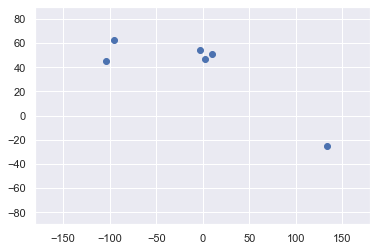

In [9]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [10]:
x = data.iloc[:,1:3]

In [11]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-95.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [14]:
kmeans = KMeans(3)

In [15]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [16]:
identified_cluster = kmeans.fit_predict(x)

In [17]:
identified_cluster

array([2, 2, 0, 0, 0, 1])

In [18]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-95.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


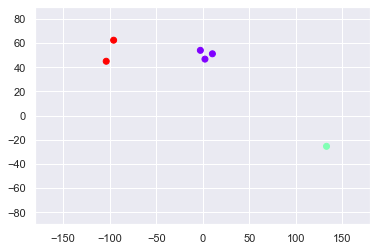

In [19]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow' )
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [21]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2 })
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-95.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [33]:
# x = data_mapped.iloc[:,3:4]
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-95.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [34]:
kmeans = KMeans(3)

In [35]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [36]:
identified_cluster = kmeans.fit_predict(x)

In [37]:
identified_cluster

array([2, 2, 0, 0, 0, 1])

In [38]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-95.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


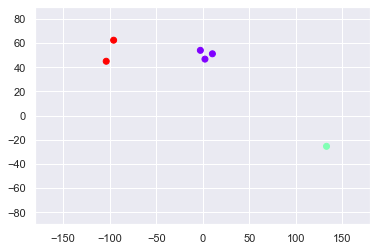

In [39]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow' )
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [41]:
kmeans.inertia_

297.5752333333333

In [42]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\ydhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
wcss

[42431.710233333346,
 13092.278119999999,
 297.5752333333333,
 113.9123333333333,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-Cluster Sum of Squares')

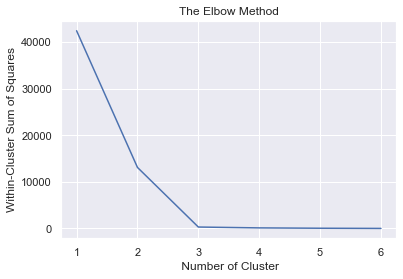

In [46]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel(' Number of Cluster')
plt.ylabel('Within-Cluster Sum of Squares')
